<!-- ###  导入机器学习的相关工具 -->


In [18]:
# from IPython.display import display_html
# display_html("""<button onclick="$('.input,  .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [19]:

filenames = ['EIS_data.txt', 'Capacity_data.txt', 'EIS_data_35C02.txt', 'capacity35C02.txt']
EIS_data = np.loadtxt(filenames[0],delimiter='\t')
Capacity_data = np.loadtxt(filenames[1],delimiter='\t')
EIS_data_35C02 = np.loadtxt(filenames[2],delimiter='\t')
capacity35C02 = np.loadtxt(filenames[3],delimiter='\t')


EIS_data_new = pd.DataFrame(EIS_data)
Capacity_data_new = pd.DataFrame(Capacity_data)
columns=[]
for i in range(1,61):
        columns.append('Real Z'+str(i))
    
for i in range(1,61):
        columns.append('Imaginary Z'+str(i))   
    

    
EIS_data_new.columns=columns
Capacity_data_new.columns = ['Capacity']



In [20]:

EIS_data_new = pd.DataFrame(EIS_data)
Capacity_data_new = pd.DataFrame(Capacity_data)
columns=[]
for i in range(1,61):
        columns.append('Real Z'+str(i))
    
for i in range(1,61):
        columns.append('Imaginary Z'+str(i))   
    

    
EIS_data_new.columns=columns
Capacity_data_new.columns = ['Capacity']
EIS_data_new # 训练集_输入（电化学阻抗谱）

,Real Z1,Real Z2,Real Z3,Real Z4,Real Z5,Real Z6,Real Z7,Real Z8,Real Z9,Real Z10,...,Imaginary Z51,Imaginary Z52,Imaginary Z53,Imaginary Z54,Imaginary Z55,Imaginary Z56,Imaginary Z57,Imaginary Z58,Imaginary Z59,Imaginary Z60
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0.77228,0.77992,0.78750,0.79594,0.80225,0.80833,0.81657,0.82278,0.83013,0.83697,...,0.08681,0.10118,0.11621,0.13356,0.15785,0.18904,0.22356,0.25456,0.28406,0.31743
1354,0.77439,0.78211,0.78999,0.79706,0.80398,0.81029,0.81627,0.82467,0.83234,0.83909,...,0.08563,0.09931,0.11901,0.14191,0.16804,0.18878,0.21408,0.24479,0.27689,0.30725
1355,0.77434,0.78063,0.78968,0.79724,0.80501,0.81171,0.81882,0.82585,0.83247,0.83993,...,0.08606,0.09905,0.11752,0.14136,0.16816,0.19209,0.21542,0.24478,0.27801,0.30984
1356,0.77357,0.78210,0.79025,0.79816,0.80343,0.81125,0.81834,0.82644,0.83290,0.84006,...,0.08681,0.09961,0.11543,0.13883,0.16643,0.19362,0.21829,0.24592,0.27964,0.31379


### 输出数据：电池的容量值

In [21]:
Capacity_data_new # 训练集_输出

,Capacity
0,37.20271
1,36.22303
2,35.58930
3,35.10808
4,34.76728
...,...
1353,31.05208
1354,30.99726
1355,31.01811
1356,30.98132


In [22]:

scaler = StandardScaler()


# X_train是标准化之后的模型输入
X_train = scaler.fit_transform(EIS_data)
std = np.std(EIS_data, axis=0)
mean = np.mean(EIS_data, axis=0)



# Y_train是模型输出
Y_train = Capacity_data

X_train_new = pd.DataFrame(X_train)
X_train_new

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.147749,-0.147580,-0.155488,-0.160018,-0.167590,-0.163949,-0.167770,-0.176121,-0.177981,-0.173665,...,-0.743492,-0.752219,-0.791432,-0.898690,-0.958177,-0.867309,-0.619771,-0.441471,-0.442363,-0.497866
1,-0.132036,-0.140508,-0.141010,-0.142648,-0.148175,-0.153033,-0.155335,-0.156681,-0.157086,-0.161844,...,-0.692410,-0.618570,-0.624116,-0.689998,-0.788379,-0.804651,-0.690144,-0.632713,-0.662606,-0.594180
2,-0.126295,-0.130789,-0.134036,-0.139760,-0.142644,-0.144912,-0.155220,-0.147968,-0.153968,-0.152065,...,-0.662722,-0.735513,-0.747236,-0.633828,-0.555899,-0.603862,-0.697025,-0.630830,-0.500285,-0.466734
3,-0.120402,-0.129163,-0.128124,-0.132728,-0.137991,-0.141542,-0.141514,-0.147116,-0.148432,-0.140912,...,-0.645695,-0.660109,-0.666058,-0.726292,-0.773303,-0.800023,-0.603507,-0.352709,-0.272487,-0.327030
4,-0.119231,-0.124738,-0.123046,-0.131626,-0.129294,-0.136256,-0.133044,-0.141965,-0.146093,-0.139655,...,-0.631724,-0.564839,-0.525801,-0.606176,-0.701100,-0.703901,-0.596626,-0.556324,-0.586597,-0.543202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,1.316216,1.321098,1.325105,1.331885,1.329976,1.326350,1.329581,1.324401,1.322374,1.316853,...,-0.833866,-0.802790,-0.857277,-0.922454,-0.834399,-0.554020,-0.362989,-0.429367,-0.584308,-0.702558
1354,1.324186,1.329380,1.334542,1.336142,1.336574,1.333857,1.328426,1.331720,1.330989,1.325179,...,-0.885384,-0.887224,-0.731000,-0.561672,-0.430137,-0.563276,-0.659492,-0.692157,-0.748460,-0.900634
1355,1.323997,1.323783,1.333367,1.336826,1.340503,1.339297,1.338243,1.336290,1.331496,1.328478,...,-0.866610,-0.898963,-0.798197,-0.585436,-0.425376,-0.445437,-0.617582,-0.692426,-0.722819,-0.850240
1356,1.321088,1.329343,1.335527,1.340323,1.334476,1.337535,1.336395,1.338574,1.333172,1.328988,...,-0.833866,-0.873678,-0.892454,-0.694751,-0.494010,-0.390967,-0.527817,-0.661763,-0.685501,-0.773383


### 构建高斯过程回归模型并训练模型

In [23]:
# 隐藏代码
# from IPython.display import display_html
# display_html("""<button onclick="$('.input,  .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

# param_grid = {'alpha': np.logspace(-3, 3, 7),
#               'kernel': [1.0*RBF(length_scale=1.0),
#                          2.0*RBF(length_scale=1.0),
#                          5.0*RBF(length_scale=1.0)]}

# grid_search = GridSearchCV(gpr, param_grid=param_grid, cv=5)

# grid_search.fit(X_train, Y_train)

# # 输出最优超参数
# print('Best parameters:', grid_search.best_params_)

# # 输出最优模型的R2得分
# print('Best R2 score:', grid_search.best_score_)


# 最大化边缘似然函数优化



#模型构建
gpr = GaussianProcessRegressor(alpha=1,kernel=5*RBF(),n_restarts_optimizer=5)
'''
    alpha : 正则化参数，控制模型的复杂度，避免过拟合（指模型在训练数据上表现很好，在测试数据上表现不佳）
    kernel: 协方差函数，用于计算样本之间的相似度，这里用的是径向基函数（高斯核函数）利于处理高维空间的数据
    n_restarts_optimizer: 优化器的重启次数，用于寻找最佳的超参数值。
    
'''
# 模型训练
gpr.fit(X_train,Y_train)

GaussianProcessRegressor(alpha=1, kernel=2.24**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5)

### 模型评估

 评估参数使用决定系数 R^2，用于评估模型对观察到的数据拟合的好坏程度，范围在0和1之间。值越接近1，表示模型对数据的拟合效果越好。
 
 $R^2 = 1 - \frac{\sum_{i=1}^{n}\left(y_i - \hat{y_i}\right)^2}{\sum_{i=1}^{n}\left(y_i - \bar{y}\right)^2}$

其中，$y_i$ 表示观测到的实际值，$\hat{y_i}$ 表示模型的预测值，$\bar{y}$ 表示所有实际值的平均数。

In [24]:
# Testing set of the GPR model
# X_test = StandardScaler().fit_transform(EIS_data_35C02)
X_test = (EIS_data_35C02-mean)/std
Y_test = capacity35C02
# Y_test_35C02 = StandardScaler().fit_transform(capacity35C02)
# Capacity estimation of the testing cell
Y_pred, Y_pred_var = gpr.predict(X_test, return_std=True)


r2 = gpr.score(X_test, Y_test) 
print('r^2 = ',r2)

r^2 =  0.7347519823368185


### 模型预测值和实际测量值的数据对比

In [25]:
# y_pred=scale_y.inverse_transform(y_pred)
pd.DataFrame([Y_test,Y_pred])

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,40.473770,39.741610,39.173800,38.65528,38.226070,37.871450,37.592520,37.361910,37.199870,37.190530,...,27.501600,27.742930,27.833410,27.827820,27.741430,27.570170,27.525850,27.558680,27.596250,27.543000
1,39.111509,38.694237,38.484358,38.30799,38.094839,37.928691,37.797768,37.695883,37.674308,37.709747,...,29.667003,29.815166,29.823219,29.838323,29.725554,29.590439,29.569919,29.729428,29.633352,29.634588


r^2 =  0.7347519823368185


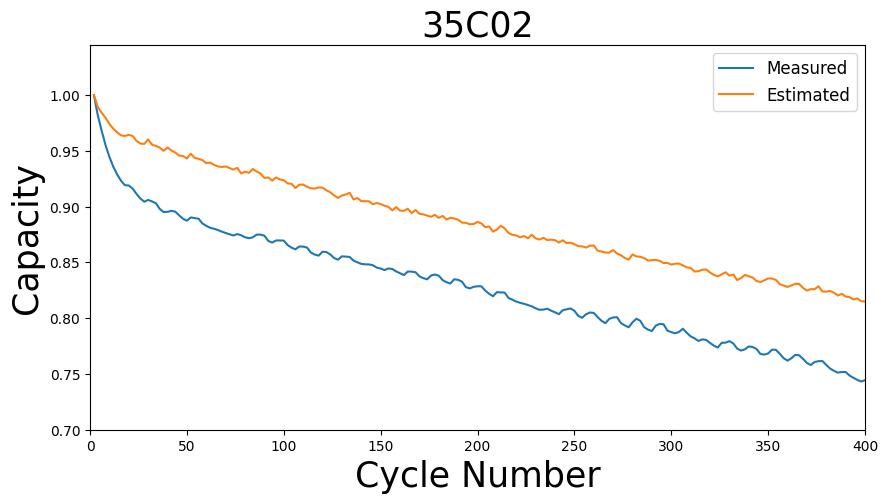

In [26]:

# plot
print('r^2 = ',r2)

Y_pred_norm = Y_pred / Y_pred[0] + Y_pred_var / Y_pred[0]
Y_pred_norm_lower = Y_pred / Y_pred[0] - Y_pred_var / Y_pred[0]
fig = plt.figure(figsize=(10, 5))
# plt.fill_between(np.arange(2, 600, 2), Y_pred_norm_lower, Y_pred_norm, color='mistyrose')
plt.plot(np.arange(2, 600, 2),capacity35C02/capacity35C02[0])
plt.plot(np.arange(2, 600, 2),Y_pred/Y_pred[0])

plt.xlim([0, 400])
plt.ylim([0.7, 1.045])


plt.xlabel('Cycle Number', fontsize=25)
plt.ylabel('Capacity', fontsize=25)
plt.title('35C02', fontsize=25)
plt.legend(['Measured', 'Estimated'], loc='upper right', fontsize=12)
plt.show()


![](./fig31.png)